# Demo notbook TSP

Demo notebook comparing classical approaches to the travellign salesman problem 
(TSP) with with the quantum Grover algorithm utilizing quantum phase estimation
and quantum adiabatic annealing (QAA).

### Import of our self written modules

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from src.simulated_annealer import SimulatedAnnealer
from src.grover import Grover
from src.brute_force_solver import BruteForceSolver
from src import helpers

Solver objects are instanciated. To quantify the grover algorithm we solve the
TSP problem with brute force as well by calculating all possible solutions and
searchig for the shortest route result. A random set of cities is generated with
`set_cities_coordinates` on a 20x20 grid.

In [2]:
grover = Grover()
brute = BruteForceSolver()
cities = grover.set_cities_coordinates(4, 20)
brute.cities = cities
brute.grid_size = 20

Let us inspect the randomly generated cities:

In [3]:
grover.cities

{'0': array([1, 4]),
 '1': array([16,  2]),
 '2': array([ 3, 19]),
 '3': array([17, 11])}

And inspect their inter city distances:

In [4]:
grover.calculate_distances(cities)

{'10': 15, '20': 15, '21': 21, '30': 17, '31': 9, '32': 16}

To visualize the problem to be solved, one can plot the cities on the given map
with `plot_cities_on_grid`

(<Figure size 500x500 with 1 Axes>, <Axes: >)

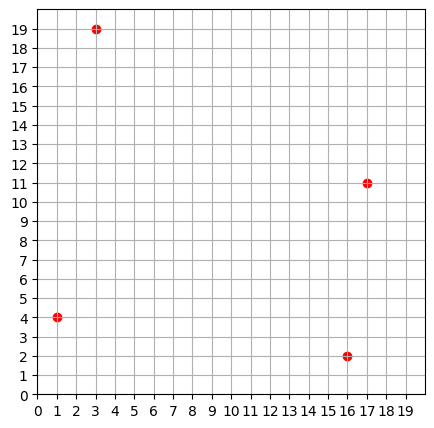

In [5]:
grover.plot_cities_on_grid()

Both solvers are run to compare their results

In [6]:
solution_brute = brute.solve_tsp(cities)
solution_grover = grover.solve_tsp(cities, verbose = True)

RESULT_bin: [('011000', 41), ('001001', 40), ('100001', 39), ('101001', 38), ('001011', 37), ('010010', 32), ('100100', 31), ('000110', 25), ('100010', 25), ('100111', 25), ('110110', 25), ('100110', 24), ('011001', 24), ('110010', 23), ('000111', 23), ('000010', 21), ('111010', 21), ('100101', 21), ('010110', 21), ('011110', 21)]
RESULT_dec: [('0231', 41, 55), ('0132', 40, 55), ('0312', 39, 62), ('0332', 38, 'Invalid'), ('0134', 37, 'Invalid'), ('0213', 32, 62), ('0321', 31, 69), ('0123', 25, 69), ('0313', 25, 'Invalid'), ('0324', 25, 'Invalid'), ('0423', 25, 'Invalid'), ('0323', 24, 'Invalid'), ('0232', 24, 'Invalid'), ('0413', 23, 'Invalid'), ('0124', 23, 'Invalid'), ('0113', 21, 'Invalid'), ('0433', 21, 'Invalid'), ('0322', 21, 'Invalid'), ('0223', 21, 'Invalid'), ('0243', 21, 'Invalid')]


In [7]:
print(
    f"The brute force solver found sequence {solution_brute} with travel"
    f"distance of {brute.get_total_travel_distance(solution_brute)}.\n"
)
print(
    f"The grover solver found sequence {solution_grover} with travel"
    f"distance of {grover.get_total_travel_distance(solution_grover)}\nThe "
    f"sequence validity is {grover.is_sequence_valid(solution_grover)}"
)

The brute force solver found sequence 0132 with traveldistance of 55.

The grover solver found sequence 0231 with traveldistance of 55
The sequence validity is True


Cities and the solutions are visualized with `plot_sequence`.

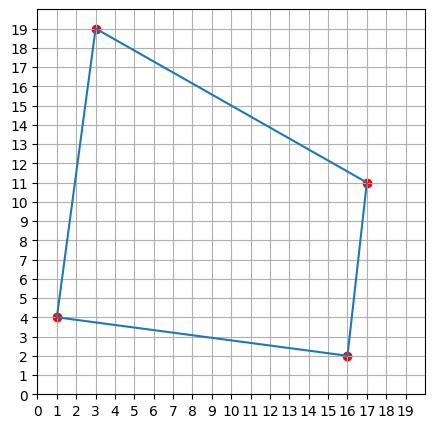

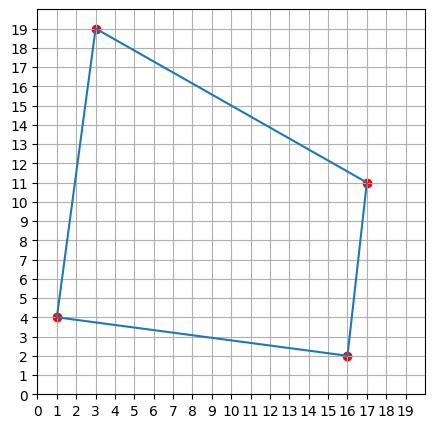

In [8]:
brute.grid_size = 20
brute.plot_sequence(solution_brute)
grover.plot_sequence(solution_grover)

In [9]:
from itertools import permutations
list(['0'+'.join(item) for item in permutations(['1','2','3'])])

['0123',
 '0132',
 '0213',
 '0231',
 '0312',
 '0321',
 '1023',
 '1032',
 '1203',
 '1230',
 '1302',
 '1320',
 '2013',
 '2031',
 '2103',
 '2130',
 '2301',
 '2310',
 '3012',
 '3021',
 '3102',
 '3120',
 '3201',
 '3210']

In [10]:
scaled_results = {}
for size in np.arange(26,4,-2, dtype = int):
    paths = []
    for i in range(100):
        cities = grover.set_cities_coordinates(4, size)
        brute.cities = cities
        solution_brute = brute.solve_tsp(cities)
        solution_grover = grover.solve_tsp(cities)
        same = helpers.sequences_are_equal(solution_brute, solution_grover)
        grover_dist = grover.get_total_travel_distance(solution_grover)
        brute_dist = grover.get_total_travel_distance(solution_brute)
        if grover_dist == 'Invalid':
            correct = False
        elif int(grover_dist) == int(brute_dist):
            correct = True
        else:
            correct = False
        run_result = [correct, same, solution_brute, solution_grover]
        paths.append(run_result)
    shortest_arr = [result[0] for result in paths]
    success_rate = sum(shortest_arr)/len(shortest_arr)
    print(f"Success rate for max grid size {size}: {success_rate}")
    scaled_results[size] = [success_rate]

The success rates of the grover solver for a given map size can be extracted
from the `scaled_results`

In [ ]:
scaled_results.values()

dict_values([[0.34], [0.34], [0.31], [0.4], [0.35], [0.32], [0.39], [0.4], [0.45], [0.51], [0.36]])

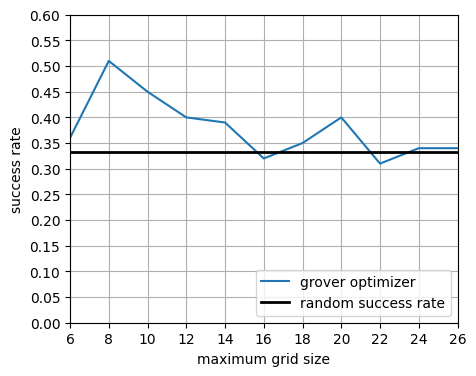

In [ ]:
fig, ax = plt.subplots(figsize = (5,4))
ax.plot(
    scaled_results.keys(),
    scaled_results.values(),
    label = 'grover optimizer'
    )
ax.set_xlim(8, 26)
ax.set_xticks(np.arange(6,28,2))
ax.set_xlabel('maximum grid size')
ax.set_yticks(np.arange(0,0.6+ 0.05, 0.05))
ax.set_ylabel('success rate')
ax.axhline(1/3, color = 'k', linewidth = 2, label = 'random success rate')
ax.grid()
ax.legend(loc = 'lower right')

In [ ]:
grover.qc.draw()

┌───┐                                                            »
 q56100_0: ┤ H ├──■────────────────────────■─────────■──────────────────────»
           ├───┤  │                        │         │                      »
 q56100_1: ┤ H ├──┼────■───────────────────┼────■────┼────■─────────────────»
           ├───┤┌─┴─┐  │  ┌───┐     ┌───┐┌─┴─┐  │    │    │                 »
 q56100_2: ┤ H ├┤ X ├──┼──┤ X ├──■──┤ X ├┤ X ├──┼────┼────┼─────────────────»
           ├───┤└───┘┌─┴─┐├───┤  │  ├───┤└───┘┌─┴─┐  │    │                 »
 q56100_3: ┤ H ├─────┤ X ├┤ X ├──■──┤ X ├─────┤ X ├──┼────┼─────────────────»
           ├───┤     └───┘└───┘  │  └───┘     └───┘┌─┴─┐  │  ┌───┐     ┌───┐»
 q56100_4: ┤ H ├─────────────────┼─────────────────┤ X ├──┼──┤ X ├──■──┤ X ├»
           ├───┤                 │                 └───┘┌─┴─┐├───┤  │  ├───┤»
 q56100_5: ┤ H ├─────────────────┼──────────────────────┤ X ├┤ X ├──■──┤ X ├»
           └───┘               ┌─┴─┐┌───┐               └───┘└───┘  │  └───┘»
 q56100_6: ────────────────────┤ X ├┤ X ├───────────────────────────┼───────»
                               └───┘└───┘                         ┌─┴─┐┌───┐»
 q56100_7: ───────────────────────────────────────────────────────┤ X ├┤ X ├»
                                                                  └───┘└───┘»
 q56100_8: ─────────────────────────────────────────────────────────────────»
                                                                            »
 q56100_9: ─────────────────────────────────────────────────────────────────»
                                                                            »
q56100_10: ─────────────────────────────────────────────────────────────────»
                                                                            »
q56100_11: ─────────────────────────────────────────────────────────────────»
                                                                            »
q56100_12: ─────────────────────────────────────────────────────────────────»
                                                                            »
q56100_13: ─────────────────────────────────────────────────────────────────»
                                                                            »
q56100_14: ─────────────────────────────────────────────────────────────────»
                                                                            »
q56100_15: ─────────────────────────────────────────────────────────────────»
                                                                            »
q56100_16: ─────────────────────────────────────────────────────────────────»
                                                                            »
q56100_17: ─────────────────────────────────────────────────────────────────»
                                                                            »
q56100_18: ─────────────────────────────────────────────────────────────────»
                                                                            »
q56100_19: ─────────────────────────────────────────────────────────────────»
                                                                            »
q56100_20: ─────────────────────────────────────────────────────────────────»
                                                                            »
q56100_21: ─────────────────────────────────────────────────────────────────»
                                                                            »
q56100_22: ─────────────────────────────────────────────────────────────────»
                                                                            »
q56100_23: ─────────────────────────────────────────────────────────────────»
           ┌───┐                                                            »
q56100_24: ┤ X ├────────────────────────────────────────────────────────────»
           └───┘                                                            »
  c1100: 6/══════════════════════